## **Preparation**

In [1]:
!pip install wordcloud
!pip install vaderSentiment

In [2]:
import json

#Create an empty list target_asin_objects
target_asin_objects = []

# Open Dataset
with open('Pet_Supplies.jsonl', 'r') as file:
    # Loop through each line of the file
    for line in file:
        # Parse the JSON content of each line
        data = json.loads(line.strip())
        
        # Check if the 'asin' exists and has the value 'B00KRMMJV4'
        if 'asin' in data and data['asin'] == 'B0009YWKUA':
            # Add matching JSON objects to the list target_asin_objects
            target_asin_objects.append(data)

# Print the number of target_asin_objects
print("Number of JSON objects with 'asin' as 'B0009YWKUA':", len(target_asin_objects))

# Print target_asin_objects
for obj in target_asin_objects:
    print(obj)

Number of JSON objects with 'asin' as 'B0009YWKUA': 1660
{'rating': 5.0, 'title': 'Love', 'text': 'My dogs love it.', 'images': [], 'asin': 'B0009YWKUA', 'parent_asin': 'B0BKXK352T', 'user_id': 'AFTDSPCG32FV2VPWLEYPDQARTSQA', 'timestamp': 1557924733999, 'helpful_vote': 0, 'verified_purchase': True}
{'rating': 3.0, 'title': 'Nope.', 'text': 'Both of my dogs hated it which sucks because I really do like this brand. I still buy the treats.', 'images': [], 'asin': 'B0009YWKUA', 'parent_asin': 'B0BKXK352T', 'user_id': 'AEYAEYTOPFSI52UJR57N5JNFY3RA', 'timestamp': 1658182494227, 'helpful_vote': 0, 'verified_purchase': True}
{'rating': 5.0, 'title': 'Great', 'text': 'My dogs love this', 'images': [], 'asin': 'B0009YWKUA', 'parent_asin': 'B0BKXK352T', 'user_id': 'AGGIFO47I73BPVJCROCTHTZ3QNLA', 'timestamp': 1557770290090, 'helpful_vote': 0, 'verified_purchase': True}
{'rating': 1.0, 'title': 'Know your dog', 'text': "Didn't work for my dog", 'images': [], 'asin': 'B0009YWKUA', 'parent_asin': 'B0

In [3]:
import pandas as pd

# Convert target_asin_objects list to DataFrame, export 'rating', 'text', 'timestamp' columns
df = pd.DataFrame(target_asin_objects, columns=['rating','text', 'timestamp'])
# Print df
df.head()

,rating,text,timestamp
0,5.0,My dogs love it.,1557924733999
1,3.0,Both of my dogs hated it which sucks because I...,1658182494227
2,5.0,My dogs love this,1557770290090
3,1.0,Didn't work for my dog,1542042904541
4,5.0,The most important reviewers are my 2 dogs and...,1624880190674


In [4]:
import datetime

# Defines a function that converts a timestamp to a standard date format
def convert_timestamp(timestamp):
    # Convert timestamp to integer type
    timestamp = int(timestamp)
    # Convert timestamp to date object
    date = datetime.datetime.fromtimestamp(timestamp / 1000.0)
    # Format date in yyyy-mm
    formatted_date = date.strftime('%Y-%m')
    return formatted_date

# Apply a function to the 'timestamp' column of the df and store it in the 'date' column
df['date'] = df['timestamp'].apply(convert_timestamp)

# Print date
print(df['date'])
# Find the minimum and maximum values of the 'date' column
min_date = df['date'].min()
max_date = df['date'].max()

# Print the range
print("Date Range:", min_date, "to", max_date)

0       2019-05
1       2022-07
2       2019-05
3       2018-11
4       2021-06
         ...   
1655    2023-03
1656    2023-05
1657    2010-09
1658    2023-04
1659    2023-04
Name: date, Length: 1660, dtype: object
Date Range: 2008-09 to 2023-05


In [5]:
import re

# Define a function to clean text data
def clean_text(data):
    # Remove link
    data = re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)', ' ', data)
    # Remove punctuation
    data = re.sub(r"[~.,%/:;?_&+*=!-<>()'‘’]", " ", data)
    # Remove number
    data = re.sub('[0-9]+', '', data)
    #Convert to lowercase
    data = data.lower()
    return data

# Apply the cleaning function to each text data in the 'text' column
df['text'] = df['text'].apply(clean_text)

# Print df
df

,rating,text,timestamp,date
0,5.0,my dogs love it,1557924733999,2019-05
1,3.0,both of my dogs hated it which sucks because i...,1658182494227,2022-07
2,5.0,my dogs love this,1557770290090,2019-05
3,1.0,didn t work for my dog,1542042904541,2018-11
4,5.0,the most important reviewers are my dogs and...,1624880190674,2021-06
...,...,...,...,...
1655,1.0,my dogs threw up each time they tried to eat,1680123822321,2023-03
1656,1.0,i had mold on my dog food two days after it ar...,1684420868861,2023-05
1657,5.0,my dog adores this food and so do i before s...,1284983644000,2010-09
1658,2.0,bad food nothing natural on this read the bag...,1681489660216,2023-04


In [6]:
import nltk
from nltk.corpus import stopwords

# Import English stopwords
stop_words = stopwords.words('english')
# Define additional stopword list new_stopwords
new_stopwords = ["dogs", "dog", "food", "blue", "buffalo", "one","eat","br"]
# Add new_stopwords to stop_words list
stop_words.extend(new_stopwords)

# Define a function to remove stopwords
def cleaning_stopwords(text):
    # Use spaces to connect words that are not in the stop word list
    return " ".join([word for word in str(text).split() if word not in stop_words])

# Apply the cleaning_stopwords function to each text data in the 'text' column
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))

# Display the first five columns of df['text']
df['text'].head()

0                                              love
1    hated sucks really like brand still buy treats
2                                              love
3                                              work
4                   important reviewers love gobble
Name: text, dtype: object

In [7]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Defined a function to obtain the part of speech of a word
def get_wordnet_pos(tag):
    # Part-of-speech tags starting with 'J' get wordnet.ADJ
    if tag.startswith('J'):
        return wordnet.ADJ
    #  Part-of-speech tags starting with 'V' get wordnet.VERB
    elif tag.startswith('V'):
        return wordnet.VERB
    #  Part-of-speech tags starting with 'N' get wordnet.NOUN
    elif tag.startswith('N'):
        return wordnet.NOUN
    #  Part-of-speech tags starting with 'R' get wordnet.ADV
    elif tag.startswith('R'):
        return wordnet.ADV
    # Others get None
    else:
        return None

# Creat Lemmatizer
wnl = WordNetLemmatizer()

# Define a function of lemmatization
def lemmatize_text(text):
    # Segment the input text into words
    tokens = word_tokenize(text)
    # Determine the part of speech of each word
    tagged_sent = pos_tag(tokens) 
    # Creat lemmas_sent list
    lemmas_sent = []
    # Convert the part of speech of each word
    for tag in tagged_sent:
        wordnet_pos = get_wordnet_pos(tag[1]) or wordnet.NOUN
        # Perform lemmatization
        lemmas_sent.append(wnl.lemmatize(tag[0], pos=wordnet_pos))
    # Concatenate a list of words into a string
    return ' '.join(lemmas_sent)

# Apply the lemmatize_text function to each text data in the 'text' column
df['text'] = df['text'].apply(lambda x: lemmatize_text(x))

# Display df
df

,rating,text,timestamp,date
0,5.0,love,1557924733999,2019-05
1,3.0,hat suck really like brand still buy treat,1658182494227,2022-07
2,5.0,love,1557770290090,2019-05
3,1.0,work,1542042904541,2018-11
4,5.0,important reviewer love gobble,1624880190674,2021-06
...,...,...,...,...
1655,1.0,threw time try,1680123822321,2023-03
1656,1.0,mold two day arrive get sick,1684420868861,2023-05
1657,5.0,adores switch tried variety food iams science ...,1284983644000,2010-09
1658,2.0,bad nothing natural read bag people bunch thin...,1681489660216,2023-04


## **Sentiment Analysis**

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Creat VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function of sentiment analysis
def analyze_sentiment(text):
    # Analyse text sentiment
    sentiment_scores = analyzer.polarity_scores(text)
    # Get sentiment scores
    return sentiment_scores['compound']

# Apply the analyze_sentiment function to each text data in the 'text' column
df['sentiment_score'] = df['text'].apply(analyze_sentiment)

# Define a function map_sentiment_to_level
def map_sentiment_to_level(score):
    # Sentiment score greater than or equal to 0.6 is sentiment level 5.
    if score >= 0.6:
        return 5
    # Sentiment score greater than or equal to 0.2 and less than 0.6 is sentiment level 4.
    elif score >= 0.2:
        return 4
    # Sentiment score greater than or equal to -0.2 and less than 0.2 is sentiment level 3.
    elif score >= -0.2:
        return 3
    # Sentiment score greater than or equal to -0.6 and less than -0.2 is sentiment level 2.
    elif score >= -0.6:
        return 2
    # Others is sentiment level 1.
    else:
        return 1

# Apply the map_sentiment_to_level function to each text data in the 'sentiment_score' column
df['sentiment_level'] = df['sentiment_score'].apply(map_sentiment_to_level)

# Display df
df

,rating,text,timestamp,date,sentiment_score,sentiment_level
0,5.0,love,1557924733999,2019-05,0.6369,5
1,3.0,hat suck really like brand still buy treat,1658182494227,2022-07,0.3804,4
2,5.0,love,1557770290090,2019-05,0.6369,5
3,1.0,work,1542042904541,2018-11,0.0000,3
4,5.0,important reviewer love gobble,1624880190674,2021-06,0.7184,5
...,...,...,...,...,...,...
1655,1.0,threw time try,1680123822321,2023-03,0.0000,3
1656,1.0,mold two day arrive get sick,1684420868861,2023-05,-0.5106,2
1657,5.0,adores switch tried variety food iams science ...,1284983644000,2010-09,0.2263,4
1658,2.0,bad nothing natural read bag people bunch thin...,1681489660216,2023-04,-0.4423,2


In [9]:
# Creat DataFrame combined_counts. The index is 1 to 5 and the column names are 'Sentiment Level' and 'Rating'.
combined_counts = pd.DataFrame(index=range(1, 6), columns=['Sentiment Level', 'Rating'])

# Filter and count the total for each sentiment level 1-5
for i in range(1, 6):
    count = df[df['sentiment_level'] == i]['sentiment_level'].count()
    combined_counts.at[i, 'Sentiment Level'] = count

# Filter and count the total for each rating 1-5
for i in range(1, 6):
    count = df[df['rating'] == i]['rating'].count()
    combined_counts.at[i, 'Rating'] = count

# Display combined_counts
combined_counts

,Sentiment Level,Rating
1,81,340
2,172,61
3,239,90
4,347,128
5,821,1041


In [10]:
# Display the mean of rating and sentiment level
df[['rating', 'sentiment_level']].mean()

rating             3.884940
sentiment_level    3.996988
dtype: float64

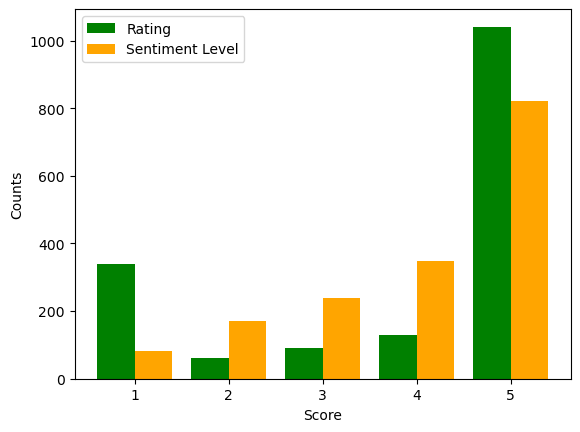

In [11]:
import matplotlib.pyplot as plt

# Draw two histograms to represent the distribution of ratings and sentiment levels respectively.
plt.hist([df['rating'],df['sentiment_level']],
      bins = range(1,7), color = ['green','orange'], label= ['Rating','Sentiment Level'])

# Set x-axis, y-axis labels
plt.xlabel("Score")
plt.ylabel("Counts")

plt.xticks([i + 0.5 for i in range(1, 6)],  # Shift x-axis ticks by 0.5
           [str(i) for i in range(1, 6)])  # Set new tick labels

#Display histograms
plt.legend()

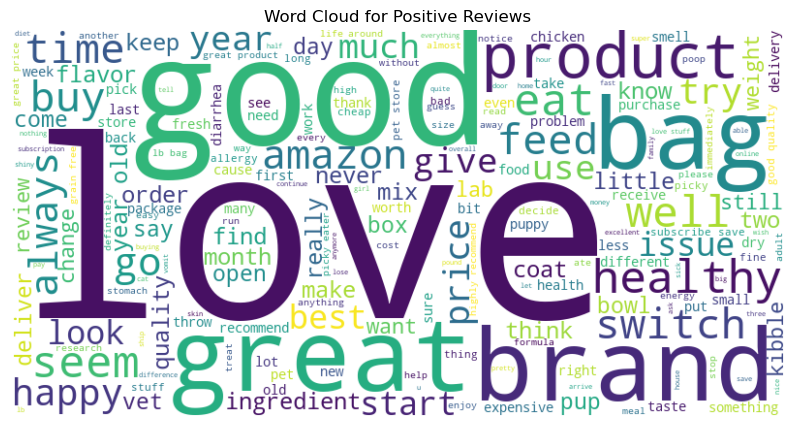

In [12]:
from wordcloud import WordCloud

# Filter the dataframe to include only sentiment levels 4 and 5
sentiment_45_df = df[df['sentiment_level'].isin([4, 5])]

# Concatenate all text data associated with sentiment levels 4 and 5
text = ' '.join(sentiment_45_df['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Set the word cloud size
plt.figure(figsize=(10, 6))
# Display images using bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Turn the axis off
plt.axis('off')
# Set the word cloud title
plt.title('Word Cloud for Positive Reviews')

# Display the word cloud
plt.show()


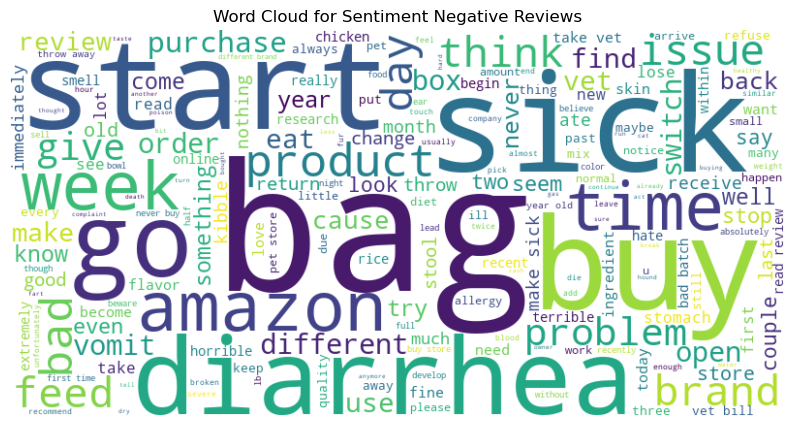

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the dataframe to include only sentiment levels 1 and 2
sentiment_12_df = df[df['sentiment_level'].isin([1, 2])]

# Concatenate all text data associated with sentiment levels 1 and 2
text = ' '.join(sentiment_12_df['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sentiment Negative Reviews')

plt.show()

## **Topic Modeling**

In [14]:
import gensim.corpora as corpora

# Defines a function generate_tokens
def generate_tokens(data):
    # Creat words list
    words=[]
    # Split the string data into words by spaces
    for word in data.split(' '):
        # Check whether the current word is an empty string
        if word!='':
           # Add non-empty string words to words list
           words.append(word)
    return words
    
#Apply the function generate_tokens to df['text']
df['tokens']=df.text.apply(generate_tokens)

# Defines a function create_dictionary
def create_dictionary(words):
    # Create words as a dictionary object
    return corpora.Dictionary(words)

#Apply the function create_dictionary to df['tokens']
id2word=create_dictionary(df['tokens'])

# Print id2word
print(id2word)

Dictionary<3060 unique tokens: ['love', 'brand', 'buy', 'hat', 'like']...>


In [15]:
# Define function create_document_matrix
def create_document_matrix(tokens,id2word):
    # Creat corpus list
    corpus = []
    # Use the doc2bow() method to convert the text in the token into document-word frequency
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
    
# Apply function to generate document-word frequency matrix
corpus=create_document_matrix(df['tokens'],id2word)

# Print the second tokens and corpus
print(df['tokens'][1])
print(corpus[1])

['hat', 'suck', 'really', 'like', 'brand', 'still', 'buy', 'treat']
[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [16]:
import gensim
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary

# Create num_topics list, from 5 to 10
num_topics = [5,6,7,8,9,10]

# Loop through the number of topics in the num_topics list
for num in num_topics:
    # Build an LDA topic model using LdaModel
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num, random_state=100)
    # Use the C_V method to calculate the coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    # Print Coherence Score for each number of topic
    print(f"Coherence Score for {num} topics:", coherence_score)


Coherence Score for 5 topics: 0.5771533729597145
Coherence Score for 6 topics: 0.6035060924659154
Coherence Score for 7 topics: 0.5910711608255517
Coherence Score for 8 topics: 0.577951284625241
Coherence Score for 9 topics: 0.583103686020998
Coherence Score for 10 topics: 0.5755851494185936


In [17]:
import pyLDAvis.gensim_models

# Train the LDA model with specified parameters
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=6, random_state=100)

# Print the topics
print(lda_model.print_topics())

[(0, '0.017*"bag" + 0.013*"get" + 0.011*"buy" + 0.011*"go" + 0.010*"amazon" + 0.009*"open" + 0.009*"year" + 0.008*"like" + 0.008*"love" + 0.008*"time"'), (1, '0.052*"love" + 0.017*"like" + 0.015*"great" + 0.015*"brand" + 0.012*"product" + 0.011*"get" + 0.008*"good" + 0.008*"look" + 0.008*"feed" + 0.007*"quality"'), (2, '0.025*"bag" + 0.014*"great" + 0.012*"love" + 0.012*"product" + 0.011*"good" + 0.010*"get" + 0.010*"vet" + 0.010*"like" + 0.008*"sick" + 0.008*"never"'), (3, '0.022*"good" + 0.017*"bag" + 0.015*"buy" + 0.012*"brand" + 0.010*"time" + 0.009*"get" + 0.009*"give" + 0.008*"year" + 0.008*"love" + 0.008*"amazon"'), (4, '0.012*"love" + 0.011*"start" + 0.011*"bag" + 0.010*"buy" + 0.009*"go" + 0.009*"get" + 0.008*"like" + 0.008*"day" + 0.007*"feed" + 0.007*"diarrhea"'), (5, '0.014*"like" + 0.013*"bag" + 0.011*"well" + 0.010*"seem" + 0.010*"love" + 0.010*"get" + 0.009*"old" + 0.008*"year" + 0.008*"time" + 0.008*"switch"')]


In [18]:
# Enable pyLDAvis visualization
pyLDAvis.enable_notebook()
# Create a topic visualization
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=100)
# Display the created pyLDAvis visualization
vis

D:\Study\Anaconda\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.014300  0.048781       1        1  26.523530
2     -0.016515 -0.047242       2        1  22.377087
3     -0.059217 -0.016457       3        1  13.887544
5     -0.039944  0.054577       4        1  13.293679
0      0.039767 -0.052460       5        1  12.049842
4      0.061610  0.012801       6        1  11.868317, topic_info=           Term        Freq       Total Category   logprob   loglift
0          love  498.000000  498.000000  Default  100.0000  100.0000
17          bag  346.000000  346.000000  Default   99.0000   99.0000
2           buy  180.000000  180.000000  Default   98.0000   98.0000
129        good  227.000000  227.000000  Default   97.0000   97.0000
64           go  138.000000  138.000000  Default   96.0000   96.0000
..          ...         ...         ...      ...       ...       ...
20         come    5.543641   70.246202   Topic6   -6.2109   -0.4081
41         coat    5.491787   69.913481   Topic6   -6.2203   -0.4127
71       always    5.560259   92.409147   Topic6   -6.2079   -0.6793
56   ingredient    5.414378   78.826205   Topic6   -6.2345   -0.5469
382        stop    5.290686   45.702885   Topic6   -6.2576   -0.0249

[1545 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1362      1  0.209412    [
1362      2  0.104706    [
1362      3  0.209412    [
1362      4  0.314119    [
1362      6  0.104706    [
...     ...       ...  ...
1324      1  0.573354    👍
1324      5  0.286677    👍
2286      6  0.570183  👍👍👍
154       2  0.537164    😊
1581      5  0.592503    🥘

[2707 rows x 3 columns], R=100, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 6, 1, 5])

In [19]:
pyLDAvis.save_html(vis, 'lda_pass10.html') 